In [15]:
import csv
import json
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3
import numpy as np
import seaborn as sns

In [16]:
rt_reviews_df = pd.read_csv('../Data/rt.reviews.tsv',
                           delimiter='\t',
                           encoding=('unicode_escape'))

In [17]:
rt_reviews_df.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [18]:
rt_reviews_df['rating'].value_counts()

3/5       4327
4/5       3672
3/4       3577
2/5       3160
2/4       2712
          ... 
3.1/5        1
6.2/10       1
2.6/5        1
9.7          1
3 1/2        1
Name: rating, Length: 186, dtype: int64

In [19]:
tnmovie = pd.read_csv('../Data/tn.movie_budgets.csv')

In [20]:
tnmovie['worldwide_gross'] = tnmovie['worldwide_gross'].str.replace("\$|,|\.", '', regex = True).astype('int64')

tnmovie['domestic_gross'] = tnmovie['domestic_gross'].str.replace("\$|,|\.", '', regex = True).astype('int64')

tnmovie['production_budget'] = tnmovie['production_budget'].str.replace("\$|,|\.", '', regex = True).astype('int64')

tnmovie['profit'] = tnmovie['worldwide_gross'] - tnmovie['production_budget']

tnmovie['perc_return'] = (tnmovie['profit'] / tnmovie['production_budget']) * 100

# Directors

In [21]:
conn = sqlite3.connect('../Data/im.db')
pd.read_sql('''
SELECT
    *
FROM
    sqlite_master

''',conn)

,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movie_id"" TEXT..."
1,table,directors,directors,3,"CREATE TABLE ""directors"" (\n""movie_id"" TEXT,\n..."
2,table,known_for,known_for,4,"CREATE TABLE ""known_for"" (\n""person_id"" TEXT,\..."
3,table,movie_akas,movie_akas,5,"CREATE TABLE ""movie_akas"" (\n""movie_id"" TEXT,\..."
4,table,movie_ratings,movie_ratings,6,"CREATE TABLE ""movie_ratings"" (\n""movie_id"" TEX..."
5,table,persons,persons,7,"CREATE TABLE ""persons"" (\n""person_id"" TEXT,\n ..."
6,table,principals,principals,8,"CREATE TABLE ""principals"" (\n""movie_id"" TEXT,\..."
7,table,writers,writers,9,"CREATE TABLE ""writers"" (\n""movie_id"" TEXT,\n ..."


# Directors SQL

In [31]:
dirs = pd.read_sql('''
SELECT
    category,
    pr.person_id,
    pr.movie_id,
    primary_name,
    primary_title
FROM
    principals as pr
INNER JOIN
    persons as p using(person_id)
INNER JOIN
    movie_basics as mb using(movie_id)
WHERE
    category = 'director'
''',conn)

dirs

,category,person_id,movie_id,primary_name,primary_title
0,director,nm0398271,tt0111414,Frank Howson,A Thin Life
1,director,nm0362736,tt0323808,Robin Hardy,The Wicker Tree
2,director,nm1145057,tt0417610,Alejandro Chomski,Asleep in the Sun
3,director,nm0707738,tt0469152,Alyssa R. Bennett,Smoking/Non-Smoking
4,director,nm0776090,tt0473032,J. Neil Schulman,Escape from Heaven
...,...,...,...,...,...
146388,director,nm9728620,tt9679036,Julia Beney,"A Girl, a Boy, a Penny and a Very, Very, Very ..."
146389,director,nm10436661,tt9681728,Alexander Zolotukhin,A Russian Youth
146390,director,nm9652770,tt9689618,Xavi Herrero,Moonface. A woman in the war.
146391,director,nm10439725,tt9689618,Xavi Herrero,Moonface. A woman in the war.


# Directors dataframe merge

In [32]:
dirs_df = pd.merge(dirs,
                  tnmovie,
                  left_on='primary_title',
                  right_on='movie')

In [33]:
dirs_df.sort_values(by='profit',
                   ascending=False,
                   inplace=True)

dirs_df

,category,person_id,movie_id,primary_name,primary_title,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,perc_return
1801,director,nm3786927,tt1775309,Atsushi Wada,Avatar,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279,553.257713
3775,director,nm10047650,tt8852130,Ravi Punj,Titanic,43,"Dec 19, 1997",Titanic,200000000,659363944,2208208395,2008208395,1004.104198
3168,director,nm0751577,tt4154756,Anthony Russo,Avengers: Infinity War,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,1748134200,582.711400
3169,director,nm0751648,tt4154756,Joe Russo,Avengers: Infinity War,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,1748134200,582.711400
353,director,nm1119880,tt0369610,Colin Trevorrow,Jurassic World,34,"Jun 12, 2015",Jurassic World,215000000,652270625,1648854864,1433854864,666.909239
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3794,director,nm0761498,tt7504726,Chris Sanders,Call of the Wild,36,"Feb 21, 2020",Call of the Wild,82000000,0,0,-82000000,-100.000000
3552,director,nm0043742,tt5519340,David Ayer,Bright,80,"Dec 13, 2017",Bright,90000000,0,0,-90000000,-100.000000
2628,director,nm0336620,tt2283336,F. Gary Gray,Men in Black: International,42,"Jun 14, 2019",Men in Black: International,110000000,3100000,3100000,-106900000,-97.181818
1111,director,nm0920425,tt1305591,Simon Wells,Mars Needs Moms,94,"Mar 11, 2011",Mars Needs Moms,150000000,21392758,39549758,-110450242,-73.633495


# Top Directors

In [34]:
top_1k_dirs = dirs_df.sort_values(by='profit', ascending=False).head(1000)

In [39]:
top_20_dirs = top_1k_dirs.value_counts('primary_name').head(20)

top_20_dirs

primary_name
Steven Spielberg      7
Jon M. Chu            5
Antoine Fuqua         5
Paul Feig             5
M. Night Shyamalan    5
Francis Lawrence      5
Ridley Scott          5
Christopher Nolan     4
Will Gluck            4
Mike Mitchell         4
Matthew Vaughn        4
James Wan             4
Jaume Collet-Serra    4
Phil Lord             3
Kay Cannon            3
David Fincher         3
David Gordon Green    3
David O. Russell      3
Tim Burton            3
Tim Story             3
dtype: int64

In [40]:
top_20_dirs = list(top_20_dirs.index)

top_20_dirs

['Steven Spielberg',
 'Jon M. Chu',
 'Antoine Fuqua',
 'Paul Feig',
 'M. Night Shyamalan',
 'Francis Lawrence',
 'Ridley Scott',
 'Christopher Nolan',
 'Will Gluck',
 'Mike Mitchell',
 'Matthew Vaughn',
 'James Wan',
 'Jaume Collet-Serra',
 'Phil Lord',
 'Kay Cannon',
 'David Fincher',
 'David Gordon Green',
 'David O. Russell',
 'Tim Burton',
 'Tim Story']

In [44]:
rev_dir = []

for director in top_20_dirs:
    direct = top_1k_dirs.loc[top_1k_dirs['primary_name'] == director]
    rev_dir.append(direct.profit.mean())
    
rev_dir

[182905685.0,
 180817733.0,
 98183459.2,
 174341927.8,
 176831934.6,
 404238308.6,
 241402894.8,
 584045121.0,
 137940678.5,
 329124127.75,
 220076214.75,
 677997115.25,
 109063752.75,
 279958564.3333333,
 257762698.66666666,
 213954431.33333334,
 125696689.33333333,
 183851045.0,
 362899400.0,
 104978293.33333333]

# Directors data visualization

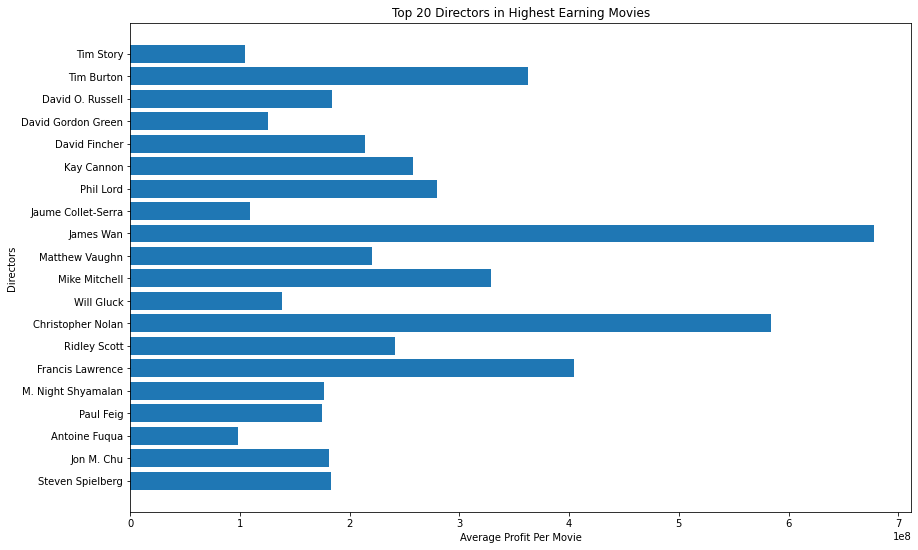

In [45]:
fig, ax = plt.subplots(figsize=(14,9))

x = rev_dir
y = top_20_dirs

ax.set_title("Top 20 Directors in Highest Earning Movies")
ax.set_ylabel("Directors")
ax.set_xlabel("Average Profit Per Movie")

ax.barh(width=x, y=y);

# Actors SQL

In [46]:
actors = pd.read_sql('''
SELECT
    category,
    pr.person_id,
    pr.movie_id,
    primary_name,
    primary_title
FROM
    principals as pr
INNER JOIN
    persons as p using(person_id)
INNER JOIN
    movie_basics as mb using(movie_id)
WHERE
    category = 'actor' 
    or
    category = 'actress'
''',conn)
actors

,category,person_id,movie_id,primary_name,primary_title
0,actor,nm0246005,tt0111414,Tommy Dysart,A Thin Life
1,actress,nm3579312,tt0323808,Brittania Nicol,The Wicker Tree
2,actor,nm2694680,tt0323808,Henry Garrett,The Wicker Tree
3,actor,nm0574615,tt0323808,Graham McTavish,The Wicker Tree
4,actress,nm0502652,tt0323808,Jacqueline Leonard,The Wicker Tree
...,...,...,...,...,...
402680,actor,nm10397910,tt9681728,Danil Tyabin,A Russian Youth
402681,actor,nm10439726,tt9689618,Christian Lacroix,Moonface. A woman in the war.
402682,actor,nm10439727,tt9689618,Christine Spengler,Moonface. A woman in the war.
402683,actor,nm10439724,tt9689618,Phillippe Warner,Moonface. A woman in the war.


# Actors datafram merge

In [47]:
actors_df = pd.merge(actors,
                  tnmovie,
                  left_on='primary_title',
                  right_on='movie')

actors_df

,category,person_id,movie_id,primary_name,primary_title,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,perc_return
0,actor,nm0000982,tt0475290,Josh Brolin,"Hail, Caesar!",22,"Feb 5, 2016","Hail, Caesar!",22000000,30080225,64160680,42160680,191.639455
1,actor,nm0000123,tt0475290,George Clooney,"Hail, Caesar!",22,"Feb 5, 2016","Hail, Caesar!",22000000,30080225,64160680,42160680,191.639455
2,actor,nm2403277,tt0475290,Alden Ehrenreich,"Hail, Caesar!",22,"Feb 5, 2016","Hail, Caesar!",22000000,30080225,64160680,42160680,191.639455
3,actor,nm0000146,tt0475290,Ralph Fiennes,"Hail, Caesar!",22,"Feb 5, 2016","Hail, Caesar!",22000000,30080225,64160680,42160680,191.639455
4,actor,nm0006763,tt10300704,Jackie Shroff,Walter,96,"Mar 13, 2015",Walter,700000,0,0,-700000,-100.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13362,actor,nm10487076,tt9805168,E. Iderbold,Traitor,25,"Aug 27, 2008",Traitor,22000000,23530831,27882226,5882226,26.737391
13363,actor,nm10480867,tt9805168,N. Yalalt,Traitor,25,"Aug 27, 2008",Traitor,22000000,23530831,27882226,5882226,26.737391
13364,actor,nm10487077,tt9805168,A. Önörjargal,Traitor,25,"Aug 27, 2008",Traitor,22000000,23530831,27882226,5882226,26.737391
13365,actor,nm9457389,tt7694546,Dongchao Tai,Beowulf,88,"Nov 16, 2007",Beowulf,150000000,82280579,195080579,45080579,30.053719


# Top Actors

In [48]:
top_1k_actors = actors_df.sort_values(by='profit',
                   ascending=False).head(1000)

In [49]:
top_25_actors = top_1k_actors.value_counts('primary_name').head(25)

top_25_actors

primary_name
Robert Downey Jr.     8
Dwayne Johnson        7
Cate Blanchett        6
Scarlett Johansson    5
Jennifer Lawrence     5
Chris Hemsworth       5
Vin Diesel            5
Chris Evans           5
Kristen Wiig          5
Anne Hathaway         5
Samuel L. Jackson     4
Chris Pratt           4
Mark Ruffalo          4
Liam Hemsworth        4
Emma Stone            4
Leonardo DiCaprio     4
Andy Serkis           4
Ian McKellen          4
Tom Hiddleston        4
Johnny Depp           4
Tom Hardy             4
Hugh Jackman          4
Jesse Eisenberg       4
Vincent Cassel        4
Will Smith            4
dtype: int64

In [50]:
top_25_actors = list(top_25_actors.index)

top_25_actors

['Robert Downey Jr.',
 'Dwayne Johnson',
 'Cate Blanchett',
 'Scarlett Johansson',
 'Jennifer Lawrence',
 'Chris Hemsworth',
 'Vin Diesel',
 'Chris Evans',
 'Kristen Wiig',
 'Anne Hathaway',
 'Samuel L. Jackson',
 'Chris Pratt',
 'Mark Ruffalo',
 'Liam Hemsworth',
 'Emma Stone',
 'Leonardo DiCaprio',
 'Andy Serkis',
 'Ian McKellen',
 'Tom Hiddleston',
 'Johnny Depp',
 'Tom Hardy',
 'Hugh Jackman',
 'Jesse Eisenberg',
 'Vincent Cassel',
 'Will Smith']

In [51]:
rev_actor = []

for actor in top_25_actors:
    acting = top_1k_actors.loc[top_1k_actors['primary_name'] == actor]
    rev_actor.append(acting.profit.mean())
    
rev_actor[0]

948241490.875

# Actors data visualization

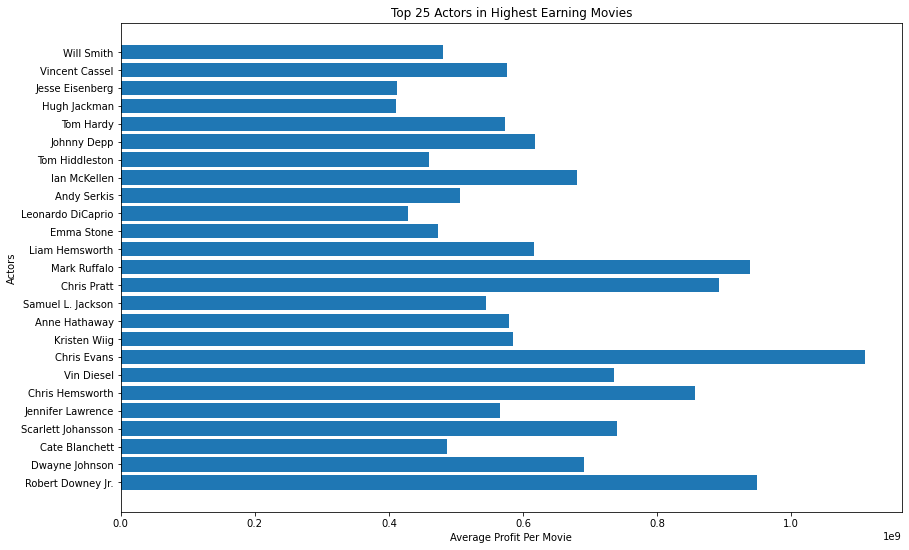

In [52]:
fig, ax = plt.subplots(figsize=(14,9))


x = rev_actor
y = top_25_actors

ax.set_title("Top 25 Actors in Highest Earning Movies")
ax.set_ylabel("Actors")
ax.set_xlabel("Average Profit Per Movie")

ax.barh(width=x, y=y);

#plot.ticklabel_format(style='plain', scilimits=(0,20), axis='y')